In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import cartopy.feature as cfeature 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import matplotlib.path as mpath
import matplotlib.cm as cm

import cmocean

In [2]:
file='/bettik/alberta/small-arctic-10km-sidfex/experiments/run_330d_nodebug/Moorings.nc'
ds=xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:                   (time: 1321, nv: 2, y: 326, x: 391)
Coordinates:
  * time                      (time) datetime64[ns] 2006-02-01 ... 2006-12-28
Dimensions without coordinates: nv, y, x
Data variables:
    Polar_Stereographic_Grid  int32 ...
    time_bnds                 (time, nv) datetime64[ns] ...
    longitude                 (y, x) float32 ...
    latitude                  (y, x) float32 ...
    siu                       (time, y, x) float32 ...
    siv                       (time, y, x) float32 ...
    hfs                       (time, y, x) float32 ...
    sic                       (time, y, x) float32 ...
    damage                    (time, y, x) float32 ...
    ridge_ratio               (time, y, x) float32 ...
    sit                       (time, y, x) float32 ...
Attributes:
    Conventions:  CF-1.6
    institution:  NERSC, Thormoehlens gate 47, N-5006 Bergen, Norway
    source:       neXtSIM model fields

In [16]:
ds.latitude

<xarray.DataArray 'latitude' (y: 326, x: 391)>
[127466 values with dtype=float32]
Dimensions without coordinates: y, x
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north

In [17]:
ds.longitude

<xarray.DataArray 'longitude' (y: 326, x: 391)>
[127466 values with dtype=float32]
Dimensions without coordinates: y, x
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east

In [18]:
var='sic'
ds[var][-1]

<xarray.DataArray 'sic' (y: 326, x: 391)>
[127466 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2006-12-28
Dimensions without coordinates: y, x
Attributes:
    standard_name:  sea_ice_area_fraction
    long_name:      Sea Ice Concentration
    units:          1
    cell_methods:   time: point area: mean

In [35]:
def plot_one_var(run,var,namevar,cmap,vmin,vmax,unit):
    file='/bettik/alberta/small-arctic-10km-sidfex/experiments/'+str(run)+'/Moorings.nc'
    ds=xr.open_dataset(file)

    plt.figure(figsize=(15, 15))
    ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0)) 
    ax.set_extent([-180, 180, 70, 90], ccrs.PlateCarree())
    land = cfeature.GSHHSFeature(scale='intermediate',
                                     levels=[1],
                                     facecolor=cfeature.COLORS['land'])
    ax.add_feature(land)
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)

    plt.pcolormesh(ds.longitude,ds.latitude,ds[var][-1],transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax,shading='auto')
    plt.colorbar()
    plt.title('Final state of '+str(namevar)+' in '+str(unit)+' for simulation '+str(run)+' '+np.datetime_as_string(ds.time[-1], unit='D'))
    plt.savefig('/bettik/alberta/plots_nextsim/plots-on-dahu/plots/map-final-state-run-'+str(run)+'-'+str(var)+'.png')

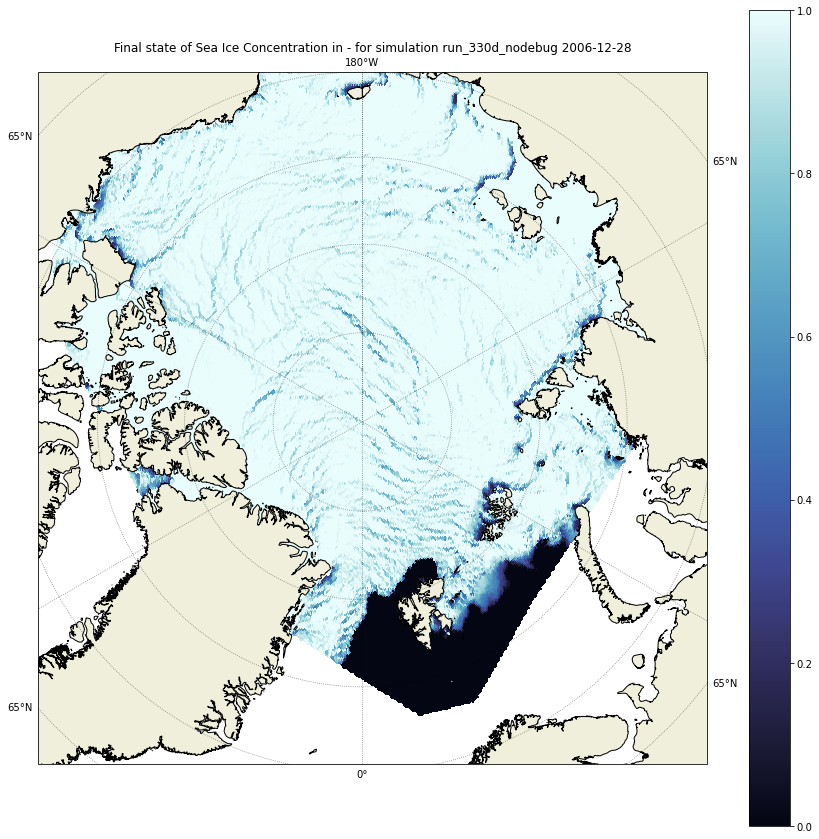

In [36]:
plot_one_var('run_330d_nodebug','sic','Sea Ice Concentration',cmocean.cm.ice,0,1,'-')

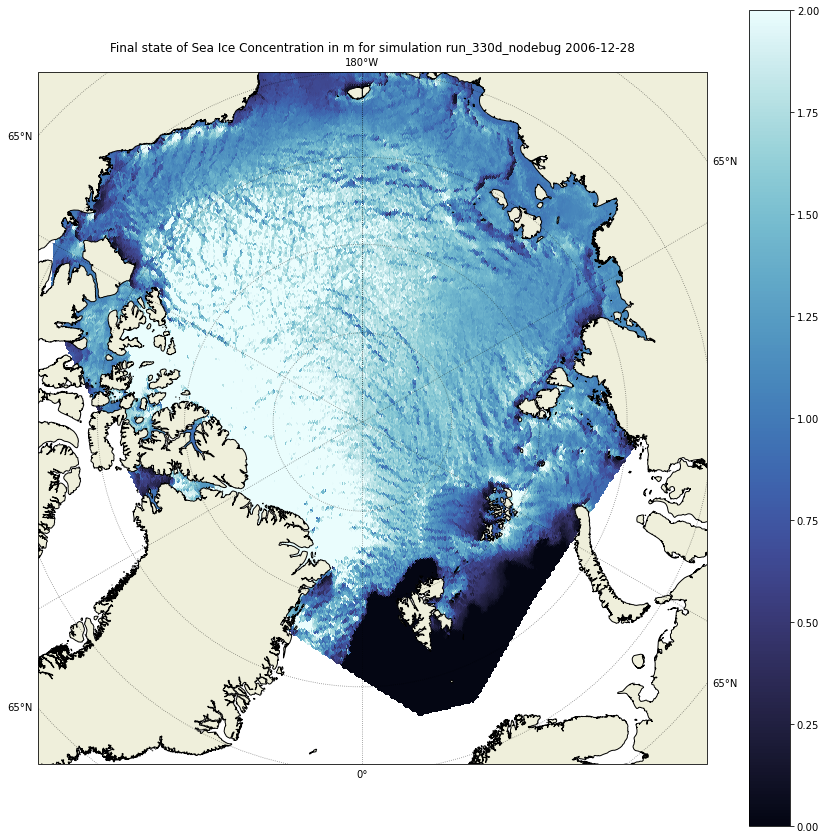

In [37]:
plot_one_var('run_330d_nodebug','sit','Sea Ice Concentration',cmocean.cm.ice,0,2,'m')

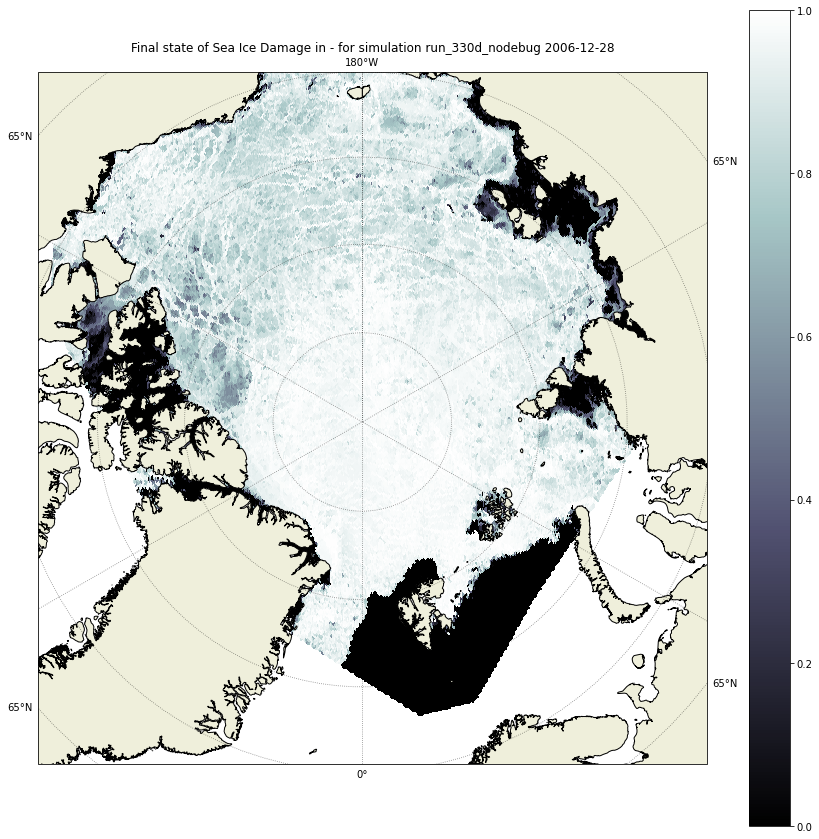

In [38]:
plot_one_var('run_330d_nodebug','damage','Sea Ice Damage','bone',0,1,'-')

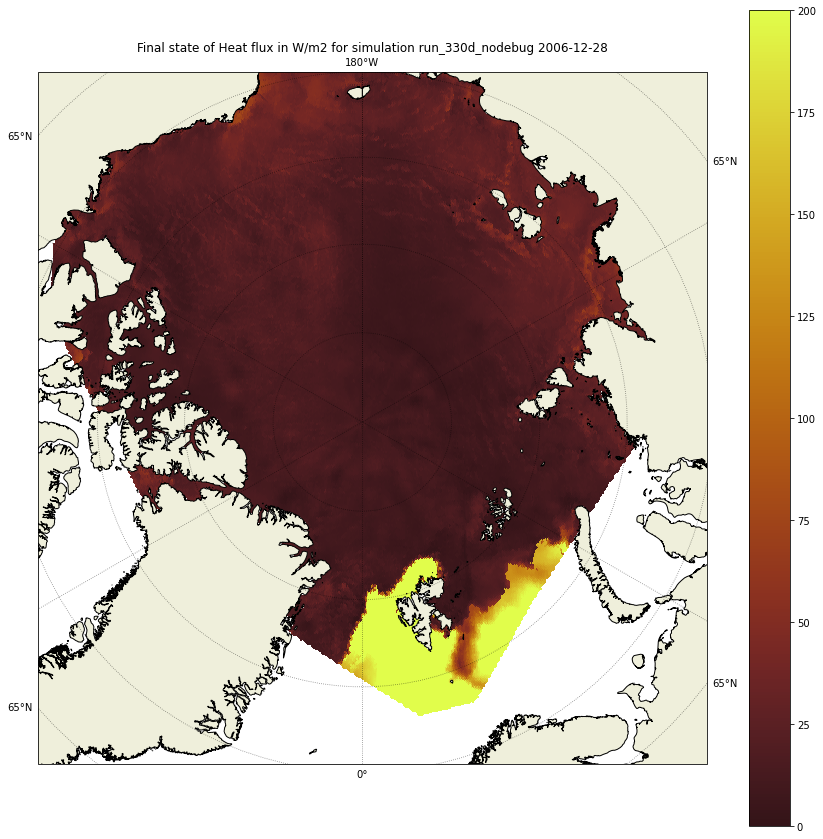

In [40]:
plot_one_var('run_330d_nodebug','hfs','Heat flux',cmocean.cm.solar,0,200,'W/m2')

In [64]:
def plot_velocities(run):
    file='/bettik/alberta/small-arctic-10km-sidfex/experiments/'+str(run)+'/Moorings.nc'
    ds=xr.open_dataset(file)

    plt.figure(figsize=(15, 15))
    ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0)) 
    ax.set_extent([-180, 180, 70, 90], ccrs.PlateCarree())
    land = cfeature.GSHHSFeature(scale='intermediate',
                                     levels=[1],
                                     facecolor=cfeature.COLORS['land'])
    ax.add_feature(land)
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)

    Q=plt.quiver(np.array(ds.longitude),np.array(ds.latitude),np.array(ds['siu'][-1]),np.array(ds['siv'][-1]),
                 scale=10000,transform=ccrs.PlateCarree())
    qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='W', coordinates='figure')

    plt.colorbar()
    plt.title('Final state of Ice velocities for simulation '+str(run)+' '+np.datetime_as_string(ds.time[-1], unit='D'))
    plt.savefig('/bettik/alberta/plots_nextsim/plots-on-dahu/plots/map-final-state-run-'+str(run)+'-velocities.png')

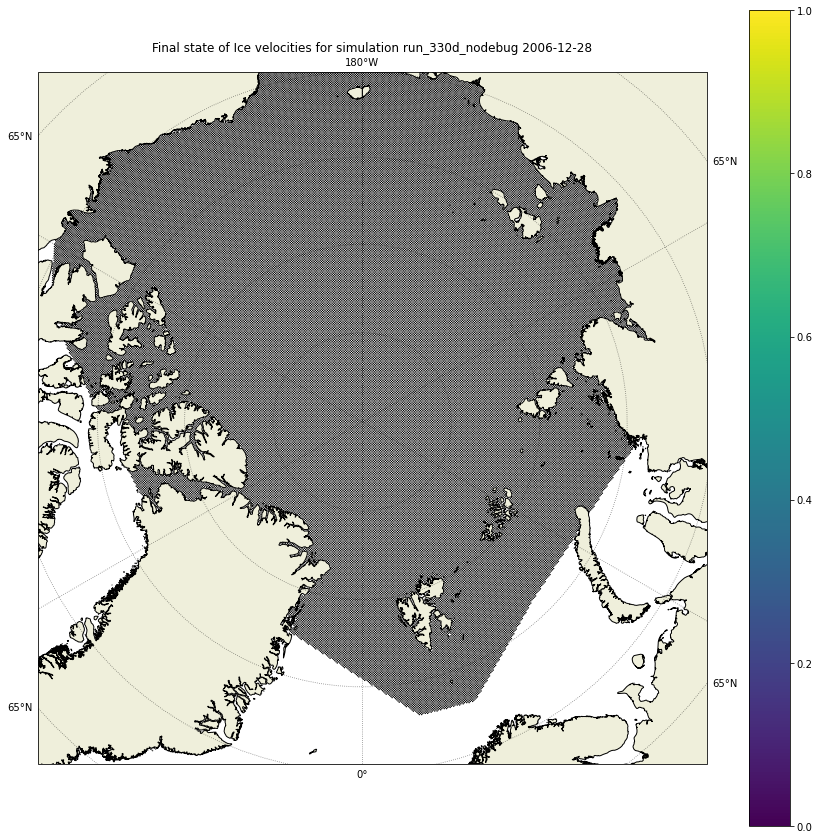

In [65]:
plot_velocities('run_330d_nodebug')


In [47]:
np.array(ds.longitude)

array([[-106.34956  , -106.24235  , -106.13441  , ...,    7.7918835,
           7.9611764,    8.129154 ],
       [-106.54548  , -106.43874  , -106.33127  , ...,    8.01639  ,
           8.185304 ,    8.352898 ],
       [-106.742134 , -106.63587  , -106.52888  , ...,    8.242229 ,
           8.410751 ,    8.577949 ],
       ...,
       [-176.51381  , -176.64015  , -176.76712  , ...,   95.89044  ,
          95.71814  ,   95.546684 ],
       [-176.65588  , -176.78229  , -176.90933  , ...,   96.03043  ,
          95.85831  ,   95.68702  ],
       [-176.79732  , -176.92381  , -177.05092  , ...,   96.16959  ,
          95.99764  ,   95.82652  ]], dtype=float32)

In [5]:
def plots_end_state_one_run(run):
    file='/bettik/alberta/small-arctic-10km-sidfex/experiments/'+str(run)+'/Moorings.nc'
    ds=xr.open_dataset(file)
    NT,Nx,Ny=ds.longitude.shape
    
    plt.figure(figsize=(15, 15))
    ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0)) 
    ax.set_extent([-180, 180, 70, 90], ccrs.PlateCarree())

    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)

    land = cfeature.GSHHSFeature(scale='intermediate',
                                     levels=[1],
                                     facecolor=cfeature.COLORS['land'])
    ax.add_feature(land)
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)

    colors = cm.rainbow(np.linspace(0, 1, Nx))
    for x in np.arange(Nx):
        plt.scatter(ds.longitude[:,x,:],ds.latitude[:,x,:],c=ds.time,s=0.1,transform=ccrs.PlateCarree())
    plt.title('Position of drifters for run '+str(run))
    plt.savefig('/bettik/alberta/plots_nextsim/plots-on-dahu/plots/map-position-drifters-run-'+str(run)+'.png')

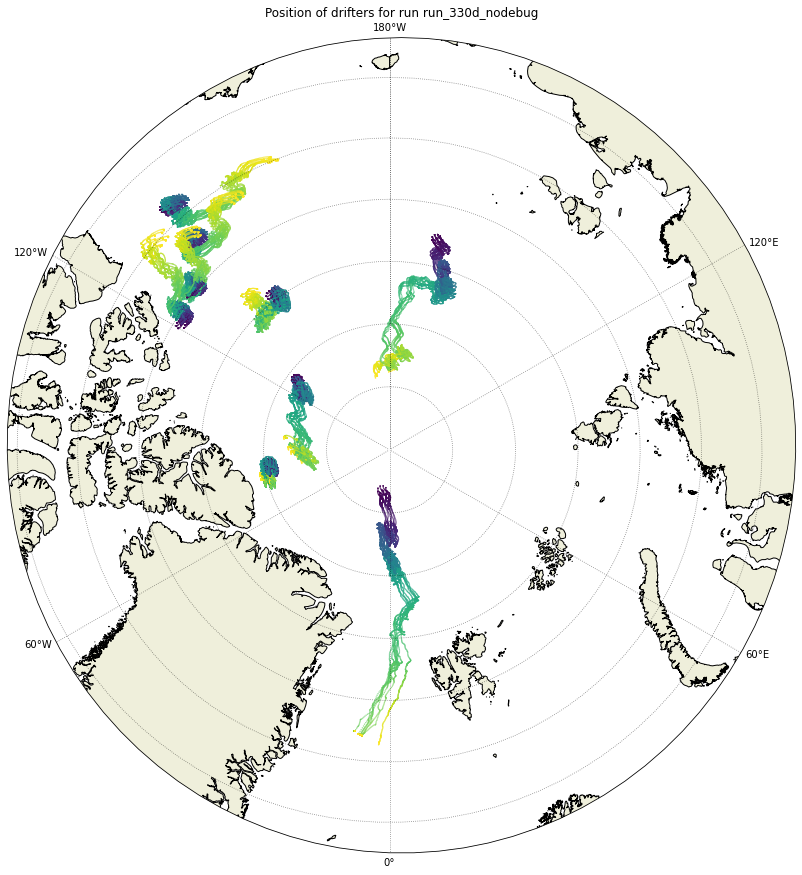

In [7]:
plot_positions_one_run('run_330d_nodebug')